In [136]:
import pandas as pd

In [137]:
hair_df = pd.read_csv('datasets/cleaned_hair.csv')
hair_df.drop(['Unnamed: 0'], inplace = True, axis = 1)
df = hair_df.copy()
hair_df.head()

,id,genetics,hormonal_changes,medical_conditions,medications_and_treatments,nutritional_deficiencies,stress,age,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


In [138]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

X = hair_df.drop(['hair_loss', 'id'], axis = 1)
y = hair_df['hair_loss']

ordinal_cols = ['stress']
nominal_cols = ['medical_conditions', 'medications_and_treatments', 'nutritional_deficiencies']

preprocessor = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(categories=[['Low', 'Moderate', 'High']]), ordinal_cols),
    ('nominal', OneHotEncoder(drop='first', sparse_output=False), nominal_cols)
], remainder='passthrough')

# Fit and transform
X_cat_encoded = preprocessor.fit_transform(X)

# Get feature names
column_names = preprocessor.get_feature_names_out()

# Create dataframe
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=column_names)

In [139]:
X_cat_encoded_df

,ordinal__stress,nominal__medical_conditions_Androgenetic Alopecia,nominal__medical_conditions_Dermatitis,nominal__medical_conditions_Dermatosis,nominal__medical_conditions_Eczema,nominal__medical_conditions_No Data,nominal__medical_conditions_Psoriasis,nominal__medical_conditions_Ringworm,nominal__medical_conditions_Scalp Infection,nominal__medical_conditions_Seborrheic Dermatitis,...,nominal__nutritional_deficiencies_Vitamin D Deficiency,nominal__nutritional_deficiencies_Vitamin E deficiency,nominal__nutritional_deficiencies_Zinc Deficiency,remainder__genetics,remainder__hormonal_changes,remainder__age,remainder__poor_hair_care_habits,remainder__environmental_factors,remainder__smoking,remainder__weight_loss
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,19.0,1.0,1.0,0.0,0.0
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,43.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,26.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,46.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,33.0,1.0,1.0,1.0,1.0
995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,47.0,0.0,0.0,0.0,1.0
996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,20.0,1.0,0.0,1.0,1.0
997,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,32.0,1.0,1.0,1.0,1.0


In [140]:
# Scale the ordinal_stress and age
ml_hair_df = X_cat_encoded_df.copy()

ml_hair_df['hair_loss'] = y

ml_hair_df

,ordinal__stress,nominal__medical_conditions_Androgenetic Alopecia,nominal__medical_conditions_Dermatitis,nominal__medical_conditions_Dermatosis,nominal__medical_conditions_Eczema,nominal__medical_conditions_No Data,nominal__medical_conditions_Psoriasis,nominal__medical_conditions_Ringworm,nominal__medical_conditions_Scalp Infection,nominal__medical_conditions_Seborrheic Dermatitis,...,nominal__nutritional_deficiencies_Vitamin E deficiency,nominal__nutritional_deficiencies_Zinc Deficiency,remainder__genetics,remainder__hormonal_changes,remainder__age,remainder__poor_hair_care_habits,remainder__environmental_factors,remainder__smoking,remainder__weight_loss,hair_loss
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,19.0,1.0,1.0,0.0,0.0,0
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43.0,1.0,1.0,0.0,0.0,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,26.0,1.0,1.0,0.0,1.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,46.0,1.0,1.0,0.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30.0,0.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,33.0,1.0,1.0,1.0,1.0,1
995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,47.0,0.0,0.0,0.0,1.0,0
996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,20.0,1.0,0.0,1.0,1.0,1
997,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,32.0,1.0,1.0,1.0,1.0,1


**Scale the dataframe for models that need scaling:**
- Models that need scaling include:
  - Logistic Regression
  - KNN

In [141]:
# scale 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

X = ml_hair_df.drop('hair_loss', axis = 1)
y = ml_hair_df['hair_loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scale_cols = ['remainder__age', 'ordinal__stress']
rest_cols = [col for col in X.columns if col not in scale_cols]

preprocessor = ColumnTransformer(transformers=[
    ('scale', StandardScaler(), scale_cols)
], remainder='passthrough')

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print(f"X Train Shape: {X_train.shape}")
print(f"X Train Scaled Shape: {X_train_scaled.shape}")
# print(f"Mean of unscaled: {np.mean(X_train)}", f"Standard Deviation of unscaled: {np.std(X_train)}")
# print(f"Mean of unscaled: {np.mean(X_train_scaled)}", f"Standard Deviation of unscaled: {np.std(X_train_scaled)}")

X Train Shape: (799, 38)
X Train Scaled Shape: (799, 38)


```python
from sklearn.module import Model

model = Model()

model.fit(X, y)

model.predict(X_new)
```

In [142]:
# Train the dataset
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

models = {"knn": KNeighborsClassifier(), "logreg": LogisticRegression()}
results = []

for model in models.values():
    kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
    results.append(cross_val_score(model, X_train_scaled, y_train, cv = kf, scoring = 'accuracy'))

for i in range(2):
    print(f"Accuracy mean from all the folds: {results[i].mean()}")

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(name + " against testing dataset: " + str(test_score))

Accuracy mean from all the folds: 0.5106761006289308
Accuracy mean from all the folds: 0.47061320754716973
knn against testing dataset: 0.51
logreg against testing dataset: 0.475


In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


models = {"dtc": DecisionTreeClassifier(), "randomforest": RandomForestClassifier()}

for model in models.values():
    kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
    results.append(cross_val_score(model, X_train, y_train, cv = kf, scoring = 'accuracy'))

for i in range(2, 4):
    print(f"Accuracy mean from all the folds: {results[i].mean()}")

for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(name + " against testing dataset: " + str(test_score))

Accuracy mean from all the folds: 0.4856996855345912
Accuracy mean from all the folds: 0.5081446540880503
dtc against testing dataset: 0.475
randomforest against testing dataset: 0.45


In [144]:
print(len(results))

4


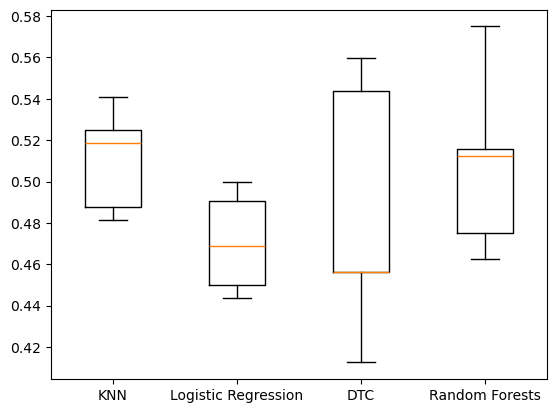

In [145]:
plt.boxplot(results, tick_labels = ['KNN', 'Logistic Regression', 'DTC', 'Random Forests'])
plt.show()

In [147]:
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_  # array of importance scores

In [152]:
len(importances)

38

C:\Users\KimSchool\AppData\Local\Temp\ipykernel_17568\1855843835.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_names, palette='viridis')


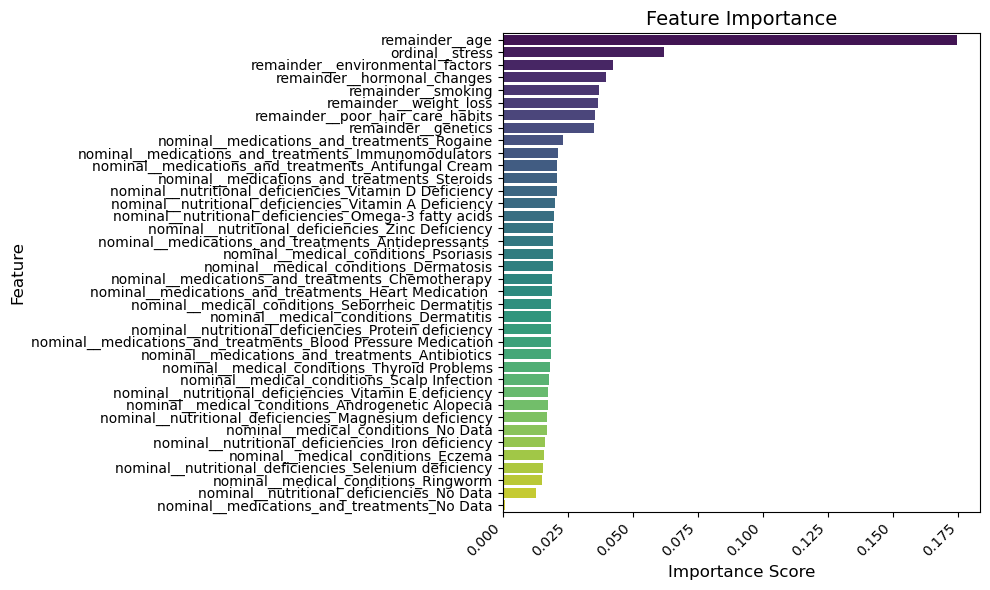

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample Data (replace with your actual data)

feature_names = np.array(ml_hair_df.columns)

# 1. Sort features by importance
# Get the indices that would sort the array in descending order
sorted_indices = np.argsort(importances)[::-1]

# Apply the sorted indices to both importance values and feature names
sorted_importances = importances[sorted_indices]
sorted_names = feature_names[sorted_indices]

# 2. Create the Bar Chart
plt.figure(figsize=(10, 6)) # Adjust figure size as needed

# Using Seaborn for a nicer aesthetic (optional)
sns.barplot(x=sorted_importances, y=sorted_names, palette='viridis')

# Adding labels and title
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importance", fontsize=14)

# Customize ticks and layout
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from being cut off

# Display the plot
plt.show()

C:\Users\KimSchool\AppData\Local\Temp\ipykernel_17568\3115606547.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances_10, y=sorted_names_10, palette='viridis')


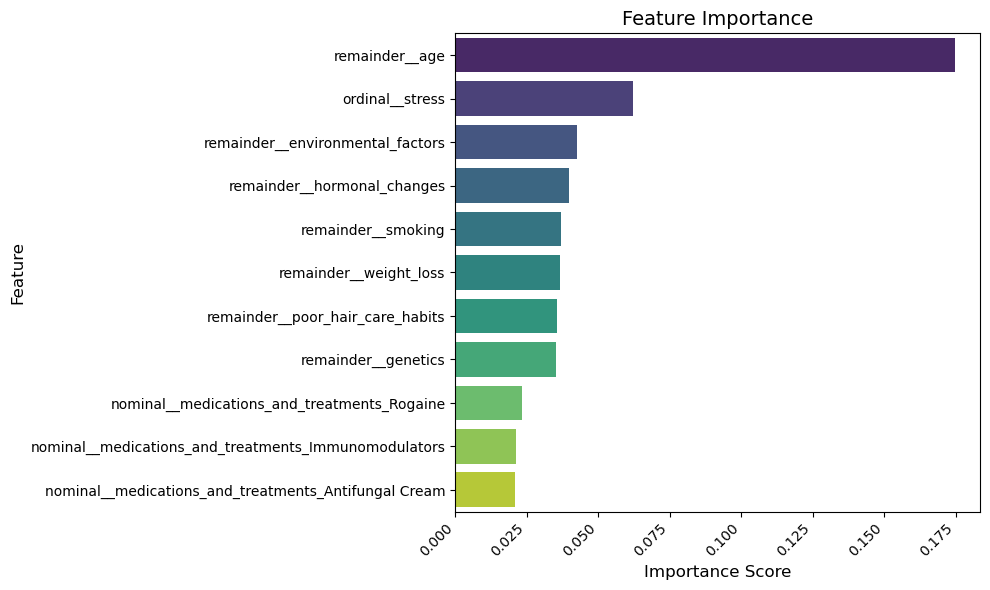

In [155]:
# 2. Create the Bar Chart
plt.figure(figsize=(10, 6)) # Adjust figure size as needed


sorted_importances_10 = sorted_importances[:11]
sorted_names_10 = sorted_names[:11]

# Using Seaborn for a nicer aesthetic (optional)
sns.barplot(x=sorted_importances_10, y=sorted_names_10, palette='viridis')

# Adding labels and title
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importance", fontsize=14)

# Customize ticks and layout
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from being cut off

# Display the plot
plt.show()